## Some Basic Statistics of CTD Data
At the OOI Global Papa Flanking Mooring B (GP03FLMB)

*Example by Sage Lichtenwalner, 1/28/2019*

For this notebook, I requsted data for the instrument GP03FLMB-RIM01-02-CTDMOG060 using the [OOI Data Portal](https://ooinet.oceanobservatories.org).  If you prefer to do everything in code, you can also request data using the OOI API by following this [quickstart example](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/quickstart_python.ipynb).

In [1]:
# First, import required libraries
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns # package for nice plotting defaults
sns.set()

In [2]:
# Specify the direct link to the data file on the OOI Thredds server 
url = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190128T192721-GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered/deployment0005_GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered_20170720T000001-20180719T234501.nc'

In [3]:
# Open the dataset using xarray
ds = xr.open_dataset(url)
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by timestamp

In [4]:
# Pull the source attribute to make sure we have the right data
source = ds.source
source

'GP03FLMB-RIM01-02-CTDMOG060-recovered_inst-ctdmo_ghqr_instrument_recovered'

## Calculating Statistics from the Data

In [5]:
# Quick Statistics
temp = ds['ctdmo_seawater_temperature'].to_pandas()
temp.describe()

count    35040.000000
mean         7.125207
std          1.416507
min          5.345440
25%          5.958201
50%          6.741027
75%          7.865782
max         13.013896
dtype: float64

In [6]:
# Let's save some statistics for later
temp_mean = temp.mean()
temp_std = temp.std()
temp_25 = temp.quantile(.25)
temp_50 = temp.quantile(.5)
temp_75 = temp.quantile(.75)

# Time Limits
xlim = [ds['time'].min().data,ds['time'].max().data]

## Time to Make Some Plots

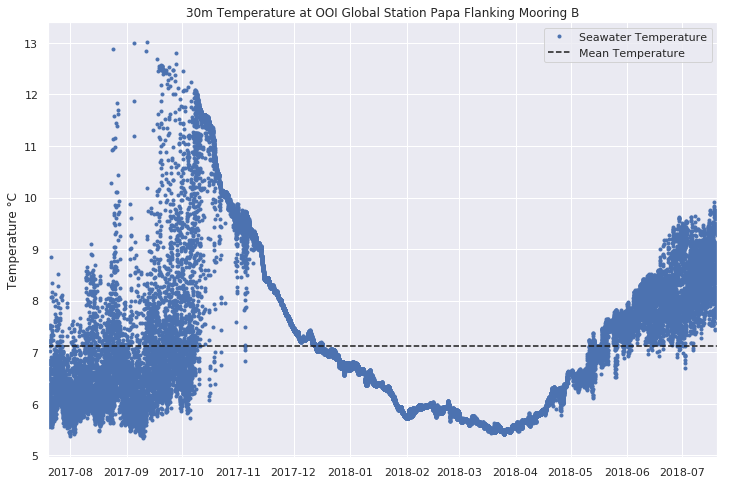

In [7]:
# Let's make a pretty plot of the raw (essentially hourly) data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))

# Raw Data
plt.plot(ds['time'],ds['ctdmo_seawater_temperature'], marker='.', linestyle='', label='Seawater Temperature')

# Mean Line
plt.plot(xlim,[temp_mean,temp_mean], linestyle='--', color='k', label='Mean Temperature')

plt.xlim(xlim)
plt.ylabel('Temperature °C')
plt.title('30m Temperature at OOI Global Station Papa Flanking Mooring B')
plt.legend();

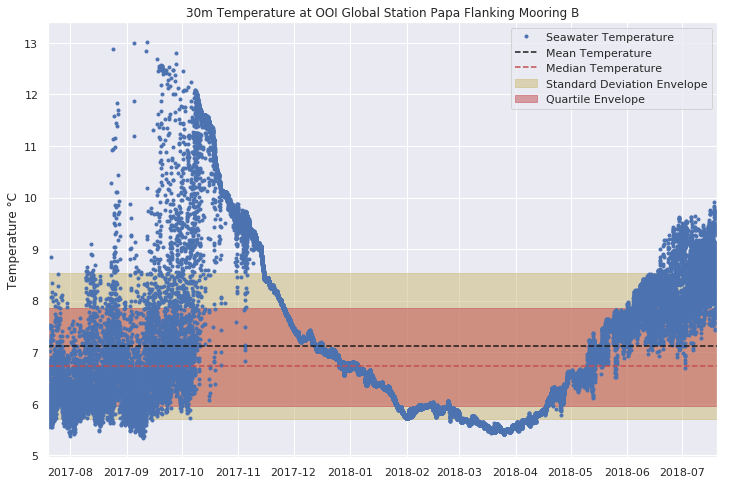

In [8]:
# Now let's add some more statistics
fig, (ax) = plt.subplots(1,1, figsize=(12,8))

# Raw Data
plt.plot(ds['time'],ds['ctdmo_seawater_temperature'], marker='.', linestyle='', label='Seawater Temperature')

# Mean Line
plt.plot(xlim,[temp_mean,temp_mean], linestyle='--', color='k', label='Mean Temperature')

# Standard Deviation Envelope
plt.fill_between(xlim, temp_mean + temp_std, temp_mean - temp_std, alpha=0.5, color='y', label='Standard Deviation Envelope')

# Quartile Envelope
plt.fill_between(xlim, temp_25, temp_75, alpha=0.5, color='r', label='Quartile Envelope')

# Median Line
plt.plot(xlim,[temp_50,temp_50], linestyle='--', color='r', label='Median Temperature')

plt.xlim(xlim)
plt.ylabel('Temperature °C')
plt.title('30m Temperature at OOI Global Station Papa Flanking Mooring B')
plt.legend();

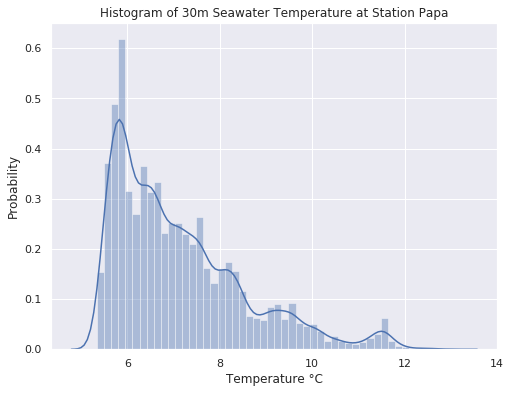

In [11]:
# A quick histogram
plt.figure(figsize=(8,6))
sns.distplot(ds['ctdmo_seawater_temperature'])
plt.xlabel('Temperature °C');
plt.ylabel('Probability');
plt.title('Histogram of 30m Seawater Temperature at Station Papa');

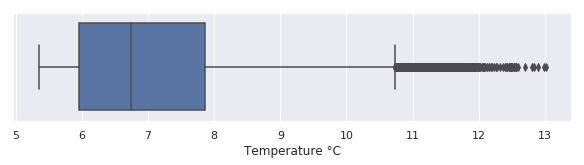

In [10]:
# A quick boxplot
plt.figure(figsize=(10,2))
sns.boxplot(ds['ctdmo_seawater_temperature'],orient='h')
plt.xlabel('Temperature °C');